# test 2 cameras
* Model A02 : 1 camera connector
* Model B01 : 2 camera connectors
* USB camera is not implemented yet

In [1]:
import sys, time, subprocess
sys.path.append('../')
from utils.camera import Camera
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check cameras
# !ls /dev/video*
connected_cameras = subprocess.check_output('ls /dev/video*', shell=True).decode('utf8')
print(connected_cameras)

/dev/video0



In [3]:
# set the connected cameras
# my jetson has 2 cameras and the jetbot only one

user_id = subprocess.check_output('id -u -n', shell=True).decode('utf8').replace('\n','')
print(f'user_id = "{user_id}"')

if user_id == 'jetbot':
    is_internal_camera0 = True
    is_internal_camera1 = False
    is_usb_camera = None
    flip_mode = 1
elif user_id == 'jetson':
    is_internal_camera0 = True
    is_internal_camera1 = True
    is_usb_camera = None
    flip_mode = -1
else:
    print('unknown')

user_id = "jetbot"


In [4]:
if is_internal_camera0:
    print('initialize internal camera 0')
    camera0 = Camera(capture_device=0, width=224, height=224, 
                     capture_width=1280, capture_height=720, capture_fps=30, flip_mode=flip_mode, debug=True)
if is_internal_camera1:
    print('initialize internal camera 1')
    camera1 = Camera(capture_device=1, width=224, height=224, 
                     capture_width=1280, capture_height=720, capture_fps=30, flip_mode=flip_mode, debug=True)
if is_usb_camera is not None:
    print('not implemented yet')

initialize internal camera 0
nvarguscamerasrc sensor-id=0 ! video/x-raw(memory:NVMM), width=1280, height=720,                 format=(string)NV12, framerate=(fraction)30/1 ! nvvidconv ! video/x-raw, width=(int)224,                 height=(int)224, format=(string)BGRx ! videoconvert ! appsink drop=true sync=false


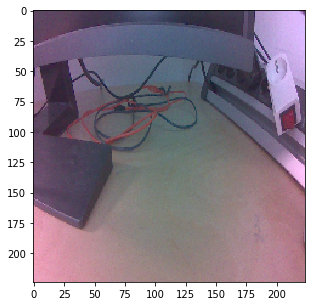

In [8]:
fig = plt.figure(figsize=(20,5))

if is_internal_camera0:
    fig.add_subplot(1, 3, 1)
    img0 = camera0.get_image_rgb()
    plt.imshow(img0)
if is_internal_camera1:
    img1 = camera1.get_image_rgb()
    fig.add_subplot(1, 3, 2)
    plt.imshow(img1);
